<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_81_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 81: Logistic Regression - Multi-Class Classification II

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Logistic Regression - Multi-Class Classification II|
|||
|**Class Description**|In this class, a student creates a multi-class classification model after applying the oversampling technique|
|||
|**Class**|C81|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Apply an oversampling technique to balance a multi-class data|
||Build a random forest classifier model|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Teacher-Student Activities

In the previous class i.e., Logistic Regression - Multi-Class Classification I, we began solving a problem statement based on multiclass-classification. We first built a logistic regression model and it couldn't identify one of the classes. In this class, we will first balance the dataset using the SMOTE oversampling technique. Then we will build a logistic regression model again. Additionally, we will build a random forest classifier model to see which one gives better results for the glass-type classification problem.

Let's quickly through the activities covered in the previous class and begin this class from **Activity 1: Oversampling Using SMOTE** section.


**Dataset Description:**

The dataset used in this problem statement involves the classification of samples of different glasses based on their physical and chemical properties. They are as follows:

1. **RI:** Refractive Index

2. **Na:** Sodium

3. **Mg:** Magnesium

4. **Al:** Aluminum

5. **Si:** Silicon

6. **K:** Potassium

7. **Ca:** Calcium

8. **Ba:** Barium

9. **Fe:** Iron

The chemical compositions are measured as the weight per cent in the corresponding oxide such as $\text{Na}_2\text{O}$, $\text{Al}_2\text{O}_3$, $\text{Si}\text{O}_2$ etc.

There are seven types (classes or labels) of glass listed; they are:

* **Class 1:** used for making building windows (float processed)

* **Class 2:** used for making building windows (non-float processed)

* **Class 3:** used for making vehicle windows (float processed)

* **Class 4:** used for making vehicle windows (non-float processed)

* **Class 5:** used for making containers

* **Class 6:** used for making tableware

* **Class 7:** used for making headlamps

A float-type glass refers to the process used to make the glass. The molten glass is introduced into a bath of molten tin, causing the glass to float freely. These glasses are used to absorb heat and UV rays.

**Dataset credits:** https://archive.ics.uci.edu/ml/datasets/Glass+Identification

**Citation:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

---

#### Data Preparation

So let's go through the routine steps before we build a logistic regression model and explore the dataset.

Link to the dataset: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/glass-types.csv

In [ ]:
# Load the dataset.
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the dataset.
file_path = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/glass-types.csv'
df = pd.read_csv(file_path, header = None)

# # Drop the 0th column as it contains only the serial numbers.
df.drop(columns = 0, inplace = True)

# A Python list containing the suitable column headers as string values. Also, create a Python dictionary as described above.
column_headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']

# Required Python dictionary.
columns_dict = {}
for i in df.columns:
  columns_dict[i] = column_headers[i - 1]

# Rename the columns.
df.rename(columns_dict, axis = 1, inplace = True)

# Display the first five rows of the data-frame.
print(df.head(), "\n")

# Get the information about the dataset.
print(df.info(), "\n")

# Get the count of each glass-type sample in the dataset.
print(df['GlassType'].value_counts(), "\n")

# Get the percentage of each glass-type sample in the dataset.
round(df['GlassType'].value_counts() * 100 / df.shape[0], 2)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  GlassType
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0          1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0          1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   GlassType  214 non-null    i

2    35.51
1    32.71
7    13.55
3     7.94
5     6.07
6     4.21
Name: GlassType, dtype: float64

Through percentages, we can clearly see the imbalance in the dataset.

---

#### Preliminary Model Building

Building a logistic regression model first without balancing the dataset.

In [ ]:
# Create separate data-frames for training and testing the model.
from sklearn.model_selection import train_test_split

# Creating the features data-frame holding all the columns except the last column
x = df.iloc[:, :-1]
print(f"First five rows of the features data-frame:\n{x.head()}\n")

# Creating the target series that holds last column 'RainTomorrow'
y = df['GlassType']
print(f"First five rows of the GlassType column:\n{y.head()}")

# Splitting the train and test sets using the 'train_test_split()' function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

First five rows of the features data-frame:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

First five rows of the GlassType column:
0    1
1    1
2    1
3    1
4    1
Name: GlassType, dtype: int64


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

# 1. First, call the 'LogisticRegression' module and store it in lg_clg
lg_clf = LogisticRegression()

# 2. Call the 'fit()' function with 'x_train' and 'y_train' as inputs.
lg_clf.fit(x_train, y_train)

# 3. Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
lg_clf.score(x_train, y_train)

0.6174496644295302

The accuracy score of the preliminary multi-class classification model built using logistic regression is 61.75%

In [ ]:
# Get the target values predicted by the logistic regression model and print the targets (or classes/labels) detected by it.
y_train_predict = lg_clf.predict(x_train)
y_train_predict = pd.Series(y_train_predict)

print("Classes or labels identified by the logistic regression model:\n", y_train_predict.unique())
print("\nCount of the labels identified by the logistic regression model:")
print(y_train_predict.value_counts())

Classes or labels identified by the logistic regression model:
 [2 1 6 5 7]

Count of the labels identified by the logistic regression model:
2    63
1    62
7    18
6     3
5     3
dtype: int64


Class `3` for the train set is not identified by the model built.

In [ ]:
# Get the target values predicted by the logistic regression model on the test set.
y_test_predict = pd.Series(lg_clf.predict(x_test))

print("Classes or labels identified by the logistic regression model on the test set:\n", y_test_predict.unique())
print("\nCount of the labels identified by the logistic regression model on the test set:")
print(y_test_predict.value_counts())

Classes or labels identified by the logistic regression model on the test set:
 [1 7 2 5]

Count of the labels identified by the logistic regression model on the test set:
2    29
1    22
7    13
5     1
dtype: int64


Classes `2` and `3` for the test set are not identified by the model built.

---

#### Activity 1: Oversampling Using SMOTE^

We will now apply the SMOTE method to synthesize the artificial data points in the training dataset to increase the data points for a minority class.

To apply the `SMOTE` method, we have to follow the steps given below:

1. Import the `SMOTE` module from the `imblearn.over_sampling` library.

2. Call the `SMOTE()` function. Inside the function:
   - Pass `sampling_strategy = "all"` parameter as an input. It denotes that after resampling the dataset, the data points for both the majority and minority class should be in equal numbers. In this case, class `2` has `53` data points and other classes have lesser data points. So they should also have `53` rows each.

   - Pass another parameter `random_state = 42` as an input to randomise the synthesis of new data points for the minority classes.

3. Apply the `fit_resample()` function from the `SMOTE` module to synthesize data for the minority class.

In [ ]:
# S1.1: Apply the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE

# Call the 'SMOTE()' function and store it in the 'smote' variable.
smote = SMOTE(sampling_strategy = "all", random_state = 42)

# Call the 'fit_sample()' function with 'x_train' and 'y_train' datasets as inputs.
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In the code above:

1. We are storing the `SMOTE(sampling_strategy = "all", random_state = 42)` function in the `smote` variable.

2. Then, we are generating the artificial values for both the feature and target values using the `fit_resample()` function and then storing them in the `x_train_resampled` and `y_train_resampled` variables, respectively.

Let's check the type and shapes of the resampled datasets.

In [ ]:
# S1.2: Check the data-types and shapes of the 'x_train', 'x_train_resampled' and 'y_train_resampled' datasets.
print(type(x_train), x_train.shape)
print(type(x_train_resampled), x_train_resampled.shape)
print(type(y_train_resampled), y_train_resampled.shape)

<class 'pandas.core.frame.DataFrame'> (149, 9)
<class 'numpy.ndarray'> (318, 9)
<class 'numpy.ndarray'> (318,)


Now let's print the count of each class in the `y_train_resampled` to check whether all the classes have an equal number of occurrences.

In [ ]:
# S1.3: Print the count of all the classes in the train set.
y_train_resampled.value_counts()

7    53
6    53
5    53
3    53
2    53
1    53
dtype: int64

---

#### Activity 2: Building Model Again

Now, let's build a logistic regression model again to classify different glass-types with the resampled train set and see whether this time the accuracy score is better.

In [ ]:
# S2.1: Build a logistic regression model again with the resampled train set.
lg_clf2 = LogisticRegression()

lg_clf2.fit(x_train_resampled, y_train_resampled)

lg_clf2.score(x_train_resampled, y_train_resampled)

0.720125786163522

So before resampling the train set, the model accuracy was 61.75% approx. After resampling, the accuracy score has increased to 72.01% approx. So clearly, the resampling technique has improved the overall accuracy of the model. However, let's just check again whether all the classes are identified or not.


In [ ]:
# S2.2: Predict the classes on the train set using the 'predict()' function of the 'LogisticRegression' class.
y_train_resampled_pred = pd.Series(lg_clf2.predict(x_train_resampled))
y_train_resampled_pred.value_counts()

1    60
6    59
5    56
3    49
7    47
2    47
dtype: int64

The logistic regression model has identified all the classes in the train set.

Let's also look at how a confusion matrix would look like in the case of multi-class classification.

---

#### Activity 3: Multi-class Classification Confusion Matrix and Classification Report^^

The layout of the confusion matrix in this case (or in general, in the case of multi-class classification) should be as follows:


||Predicted Class `1`|Predicted Class `2`|Predicted Class `3`|Predicted Class `5`|Predicted Class `6`|Predicted Class `7`|
|-|-|-|-|-|-|-|
|Actual Class `1`|TP||||||
|Actual Class `2`||TP|||||
|Actual Class `3`|||TP||||
|Actual Class `5`||||TP|||
|Actual Class `6`|||||TP||
|Actual Class `7`||||||TP|


So the confusion matrix should have 6 rows and 6 columns because there are 6 classes (1, 2, 3, 5, 6 and 7) to be identified.

In [ ]:
# S3.1: Create a confusion matrix between the actual and the predicted 'y_train_resampled' values.
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_train_resampled, y_train_resampled_pred)
conf_matrix

array([[32,  8, 13,  0,  0,  0],
       [10, 24, 11,  3,  5,  0],
       [18, 11, 24,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  2],
       [ 0,  0,  0,  0, 53,  0],
       [ 0,  4,  1,  2,  1, 45]])

The diagonal elements in the confusion matrix are the true positive values. So according to the above confusion matrix obtained:

- 32 values of class `1` are **correctly** predicted as class `1` and 8 and 13 values are incorrectly predicted as class `2` and class `3` respectively.

- 24 values of class `2` are **correctly** predicted as class `2` and 10, 11, 3 and 5 values are incorrectly predicted as class `1`, class `3`, class `5` and class `6` respectively.

- 24 values of class `3` are **correctly** predicted as class `3` and 18 and 11 values are incorrectly predicted as class `1` and class `2` respectively.

- 51 values of class `5` are **correctly** predicted as class `5` and 2 values are incorrectly predicted as class `7`.

- 53 values of class `6` are **correctly** predicted as class `6`.

- 45 values of class `7` are **correctly** predicted as class `7` and 4, 1, 2 and 1 values are incorrectly predicted as class `2`, class `3`, class `5` and class `6` respectively.

**Note:** The values reported in the above confusion matrix may vary slightly every time you build a logistic regression model again.

Now let's label the rows and columns of the confusion matrix with the classes so that it is easier to distinguish between the classes in the case of multi-class classification. For this, we will create a Pandas DataFrame object for the confusion matrix. Currently, it is a NumPy array object. Then, we will create a heatmap for the confusion matrix data-frame.

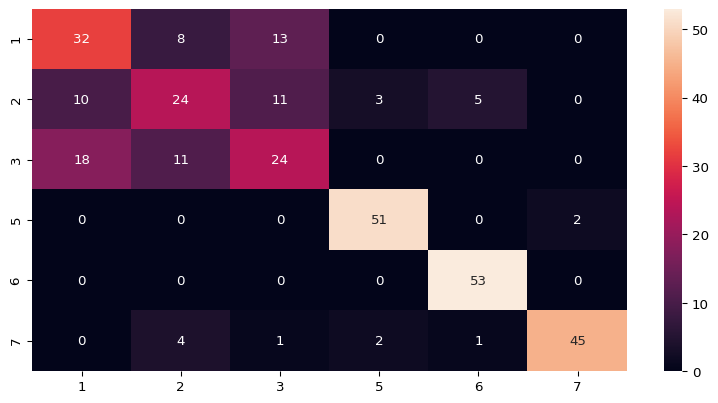

In [ ]:
# S3.2: Recreate the confusion matrix between the actual and predicted 'y_train_resampled' values with the row and column labels.
# Create an array containing all the unique labels in increasing order.
labels = pd.Series(y_train_resampled).sort_values(ascending = True).unique()

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
cm_df = pd.DataFrame(conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(cm_df, annot = True)
plt.show()

As you can see, all the rows and columns of the confusion matrix are now labelled and you can easily distinguish between the values reported for different classes in the matrix.

Now let's print the precision, recall and f1-score values to further assess the efficacy of the model built.

In [ ]:
# S3.3: Print the classification report for the test set.
print(classification_report(y_train_resampled, y_train_resampled_pred))

              precision    recall  f1-score   support

           1       0.53      0.60      0.57        53
           2       0.51      0.45      0.48        53
           3       0.49      0.45      0.47        53
           5       0.91      0.96      0.94        53
           6       0.90      1.00      0.95        53
           7       0.96      0.85      0.90        53

    accuracy                           0.72       318
   macro avg       0.72      0.72      0.72       318
weighted avg       0.72      0.72      0.72       318



So for classes `1, 2` and `3`, the f1-scores are less than 0.60 because of which the overall accuracy of the model is 72.01%

---


#### Activity 4: Building Random Forest Classifier Model^^^

So even the oversampling approach didn't help us with identifying all the classes accurately through the logistic regression model. Let's try to classify the different types of glasses using the Random Forest Classifier model.

In [ ]:
# S4.1: Build a random forest classifier model to predict different glass-types.
# Import the 'RandomForestClassifier' module.
from sklearn.ensemble import RandomForestClassifier

# Create an object of the 'RandomForestClassifier' class and store it in the 'rf_clf' variable.
rf_clf = RandomForestClassifier()

# Call the 'fit()' function on the 'RandomForestClassifier' object with 'x_train' and 'y_train' as inputs.
rf_clf.fit(x_train, y_train)

# Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
rf_clf.score(x_train, y_train)

1.0

So the accuracy score obtained is 100% on the train set. Let's make a confusion matrix and print the f1-scores.

In [ ]:
# S4.2: Make predictions on the train set and print the count of each of the classes predicted.
rf_y_train_pred = pd.Series(rf_clf.predict(x_train))
rf_y_train_pred.value_counts()

2    53
1    51
7    19
3    13
5     7
6     6
dtype: int64

So all the classes have been identified which is expected because the accuracy score is 1.

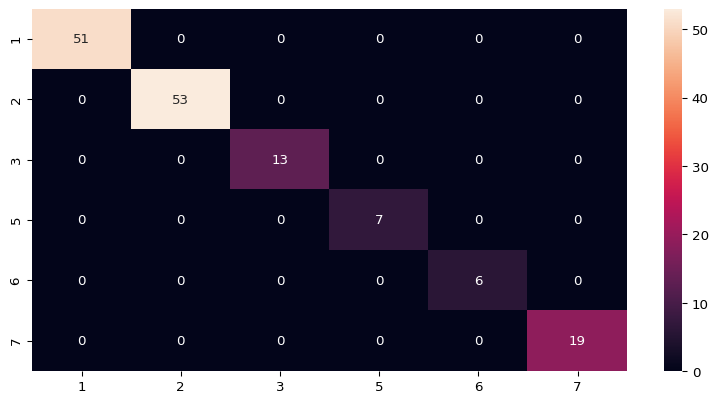

In [ ]:
# S4.3: Create the confusion matrix between the actual and the predicted values for the train set.
rf_train_conf_matrix = confusion_matrix(y_train, rf_y_train_pred)

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
rf_train_cm_df = pd.DataFrame(rf_train_conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_train_cm_df, annot = True)
plt.show()

The above confusion matrix contains only true positive values. So we don't need to calculate the f1-scores because they all will be 1 for all the glass-types. So let's create a confusion matrix and calculate f1-scores for the test set.

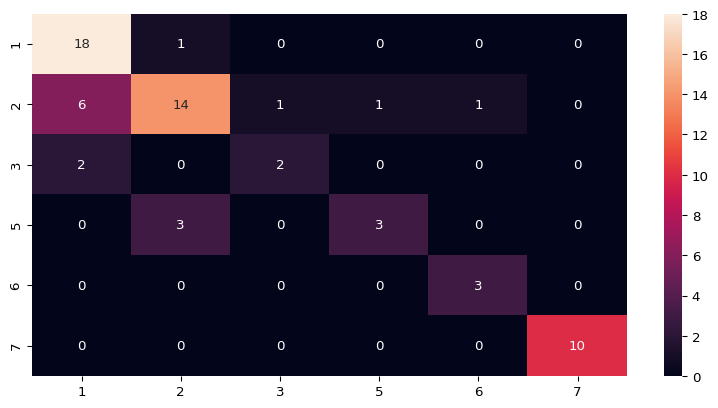

In [ ]:
# S4.4: Create the confusion matrix between the actual and predicted values for the test set.
rf_y_test_pred = pd.Series(rf_clf.predict(x_test))

rf_test_conf_matrix = confusion_matrix(y_test, rf_y_test_pred)

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
rf_test_cm_df = pd.DataFrame(rf_test_conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df, annot = True)
plt.show()

From the confusion matrix, we can see that there is some misclassification. Let's print the f1-scores for the test set values.

In [ ]:
# S4.5: Print the classification report for the test set.
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           1       0.69      0.95      0.80        19
           2       0.78      0.61      0.68        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.77        65
   macro avg       0.77      0.76      0.75        65
weighted avg       0.78      0.77      0.76        65



So the f1-score is low only for class `3` maybe because it is a minority class. The random forest classifier is working well for all other classes on the non-resampled dataset because for all the labels, the f1-scores are greater than 0.50.

Let's see how it performs when we build it again on the resampled train set.

In [ ]:
# S4.6: Build a random forest classifier model on the resampled train set.
rf_clf_res = RandomForestClassifier()

# Call the 'fit()' function on the 'RandomForestClassifier' object with 'x_train' and 'y_train' as inputs.
rf_clf_res.fit(x_train_resampled, y_train_resampled)

# Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
rf_clf_res.score(x_train_resampled, y_train_resampled)

1.0

The accuracy score is almost 100% in this case.

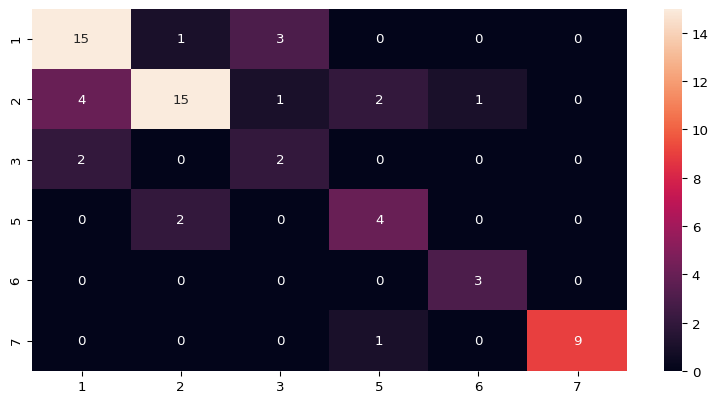

In [ ]:
# S4.7: Create a confusion matrix on the test set directly.
# Get the predicted labels on the test set obtained from the RFC model built on the resample train set.
rf_y_test_pred_res = pd.Series(rf_clf_res.predict(x_test))

# Create a confusion matrix.
rf_test_conf_matrix_res = confusion_matrix(y_test, rf_y_test_pred_res)

# Create a Pandas DataFrame object for the confusion matrix created above and labelled with the classes.
rf_test_cm_df_res = pd.DataFrame(rf_test_conf_matrix_res, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df_res, annot = True)
plt.show()

From the above confusion matrix, we can see that there is some misclassification of the classes for the test set.

Let's print the classification report to see if there is any further improvement in the f1-scores especially for class `3`.

In [ ]:
# S4.8: Print the classification report for the test set.
print(classification_report(y_test, rf_y_test_pred_res))

              precision    recall  f1-score   support

           1       0.71      0.79      0.75        19
           2       0.83      0.65      0.73        23
           3       0.33      0.50      0.40         4
           5       0.57      0.67      0.62         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.74        65
   macro avg       0.70      0.75      0.72        65
weighted avg       0.77      0.74      0.74        65



From the classification report, we can see that the f1-scores have decreased probably because of oversampling in the case of the random forest classifier based multi-class classification model. Hence, the previous random forest classifier model (without oversampling) is the most accurate one for this problem statement.

So this is it. You have now learnt how to solve multi-class classification problems using both logistic regression and random forest classification.

Let's stop here. In the next class, you will learn a new machine learning algorithm called Support Vector Machines.

---

### Activities

**Teacher Activities:**

1. Logistic Regression - Multiclass Classification II (Class Copy)
   
   Link on Panel

2. Logistic Regression - Multiclass Classification II (Reference)

   Link on Panel

---